In [1]:
import pandas as pd
import subprocess
import pybedtools
%matplotlib inline

In [2]:
meta_data = pd.read_csv('/data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/metadata_gm12878.tsv', sep='\t')

In [8]:
meta_data['Output type'].unique()

array(['optimal IDR thresholded peaks',
       'peaks and background as input for IDR',
       'conservative IDR thresholded peaks', 'peaks',
       'pseudoreplicated IDR thresholded peaks'], dtype=object)

In [29]:
optimal_IDR_peaks = meta_data[(meta_data['File assembly'] == 'hg19') & (meta_data['Output type'] == 'optimal IDR thresholded peaks')]

In [31]:
for url in optimal_IDR_peaks['File download URL']:
    subprocess.run(f"wget {url} -P /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/", shell=True)

In [33]:
!zcat /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/EN*.gz | sort -k1,1 -k2,2n > /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/optimal_IDR_peaks_184_hg19.bed

In [13]:
peaks = pd.read_csv('optimal_IDR_peaks_117_merged.bed', sep='\t', header=None)
peaks

,0,1,2
0,chr1,9921,10265
1,chr1,267782,268226
2,chr1,610619,610807
3,chr1,629594,630084
4,chr1,633797,634241
...,...,...,...
239780,chrY,15355488,15355641
239781,chrY,26669203,26669567
239782,chrY,26670282,26671840
239783,chrY,56685421,56685741


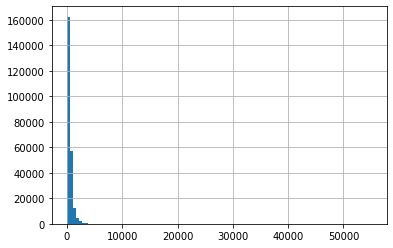

In [14]:
(peaks[2] - peaks[1]).hist(bins=100)

In [15]:
(peaks[2] - peaks[1]).describe()

count    239785.000000
mean        604.807365
std         502.805104
min          58.000000
25%         350.000000
50%         444.000000
75%         700.000000
max       55069.000000
dtype: float64

In [35]:
conservative_IDR_peaks = meta_data[(meta_data['File assembly'] == 'hg19') & (meta_data['Output type'] == 'conservative IDR thresholded peaks')]

In [36]:
for url in conservative_IDR_peaks['File download URL']:
    subprocess.run(f"wget {url} -P /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/conservative/", shell=True)

In [37]:
!zcat /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/conservative/EN*.gz | sort -k1,1 -k2,2n > /data/data_repo/samzhao/F_seq/ATAC_seq_benchmark/GM12878/FeatureFiles_chip/conservative/conservative_IDR_peaks_117_hg19.bed